<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.179574,92.331666,0.430439,125.941679,125.583787,0.357892
1,0.0,1.0,79.388723,42.780021,-0.145816,132.022928,132.563100,-0.540172
2,0.0,2.0,89.912823,74.762626,-0.116636,174.558814,174.902585,-0.343772
3,0.0,3.0,88.200649,66.514969,0.826245,165.541862,164.986743,0.555119
4,0.0,4.0,77.064453,61.233535,-0.425831,147.872157,148.588597,-0.716440
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,86.367064,85.360952,0.621452,182.349469,181.529355,0.820114
59996,999.0,56.0,89.395200,64.325868,-1.920692,161.800376,163.759643,-1.959267
59997,999.0,57.0,68.640239,86.944409,-0.936415,164.648233,165.260409,-0.612176
59998,999.0,58.0,51.140380,35.412150,0.554234,97.106764,96.656087,0.450677


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    23.179574  92.331666  0.430439  125.941679  125.583787  0.357892
      1.0    79.388723  42.780021 -0.145816  132.022928  132.563100 -0.540172
      2.0    89.912823  74.762626 -0.116636  174.558814  174.902585 -0.343772
      3.0    88.200649  66.514969  0.826245  165.541862  164.986743  0.555119
      4.0    77.064453  61.233535 -0.425831  147.872157  148.588597 -0.716440
...                ...        ...       ...         ...         ...       ...
999.0 55.0   86.367064  85.360952  0.621452  182.349469  181.529355  0.820114
      56.0   89.395200  64.325868 -1.920692  161.800376  163.759643 -1.959267
      57.0   68.640239  86.944409 -0.936415  164.648233  165.260409 -0.612176
      58.0   51.140380  35.412150  0.554234   97.106764   96.656087  0.450677
      59.0   60.002205  98.285021 -1.877486  166.409740  167.791962 -1.382222

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    23.179574  92.331666  0.430439  125.941679  125.583787  0.357892
      1.0    79.388723  42.780021 -0.145816  132.022928  132.563100 -0.540172
      2.0    89.912823  74.762626 -0.116636  174.558814  174.902585 -0.343772
      3.0    88.200649  66.514969  0.826245  165.541862  164.986743  0.555119
      4.0    77.064453  61.233535 -0.425831  147.872157  148.588597 -0.716440
...                ...        ...       ...         ...         ...       ...
999.0 55.0   86.367064  85.360952  0.621452  182.349469  181.529355  0.820114
      56.0   89.395200  64.325868 -1.920692  161.800376  163.759643 -1.959267
      57.0   68.640239  86.944409 -0.936415  164.648233  165.260409 -0.612176
      58.0   51.140380  35.412150  0.554234   97.106764   96.656087  0.450677
      59.0   60.002205  98.285021 -1.877486  166.409740  167.791962 -1.382222

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.179574,92.331666,0.430439,125.941679,125.583787,0.357892
1,0.0,1.0,79.388723,42.780021,-0.145816,132.022928,132.563100,-0.540172
2,0.0,2.0,89.912823,74.762626,-0.116636,174.558814,174.902585,-0.343772
3,0.0,3.0,88.200649,66.514969,0.826245,165.541862,164.986743,0.555119
4,0.0,4.0,77.064453,61.233535,-0.425831,147.872157,148.588597,-0.716440
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,86.367064,85.360952,0.621452,182.349469,181.529355,0.820114
59996,999.0,56.0,89.395200,64.325868,-1.920692,161.800376,163.759643,-1.959267
59997,999.0,57.0,68.640239,86.944409,-0.936415,164.648233,165.260409,-0.612176
59998,999.0,58.0,51.140380,35.412150,0.554234,97.106764,96.656087,0.450677


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    23.179574  92.331666  0.430439  125.941679  125.583787  0.357892
      1.0    79.388723  42.780021 -0.145816  132.022928  132.563100 -0.540172
      2.0    89.912823  74.762626 -0.116636  174.558814  174.902585 -0.343772
      3.0    88.200649  66.514969  0.826245  165.541862  164.986743  0.555119
      4.0    77.064453  61.233535 -0.425831  147.872157  148.588597 -0.716440
...                ...        ...       ...         ...         ...       ...
999.0 55.0   86.367064  85.360952  0.621452  182.349469  181.529355  0.820114
      56.0   89.395200  64.325868 -1.920692  161.800376  163.759643 -1.959267
      57.0   68.640239  86.944409 -0.936415  164.648233  165.260409 -0.612176
      58.0   51.140380  35.412150  0.554234   97.106764   96.656087  0.450677
      59.0   60.002205  98.285021 -1.877486  166.409740  167.791962 -1.382222

[60000 rows x 6 columns]

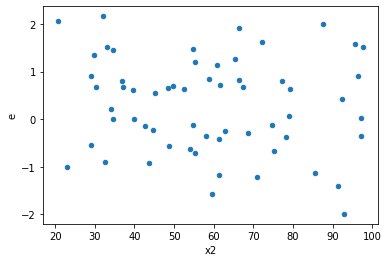

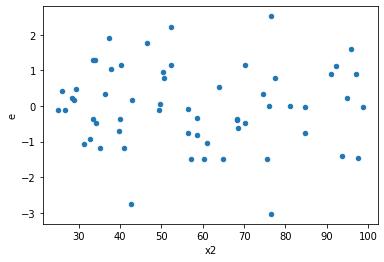

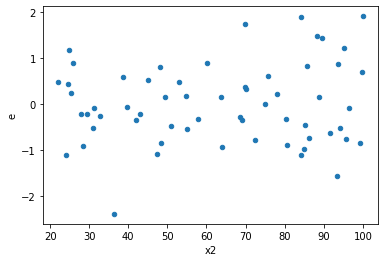

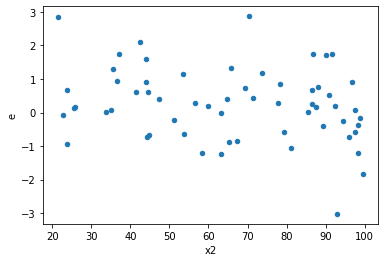

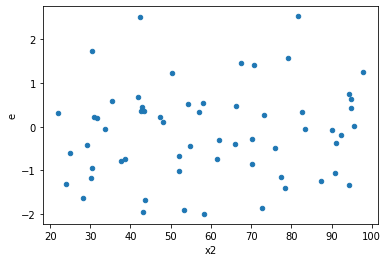

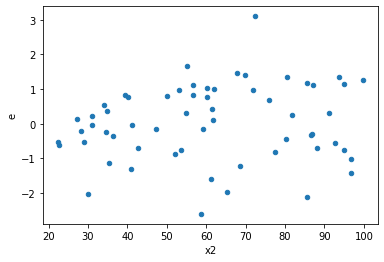

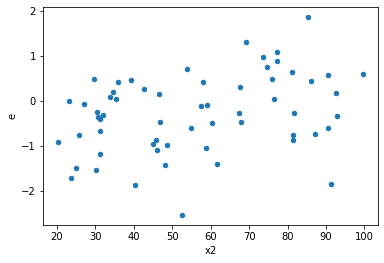

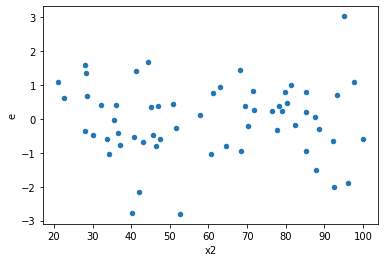

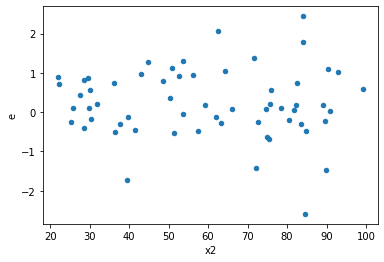

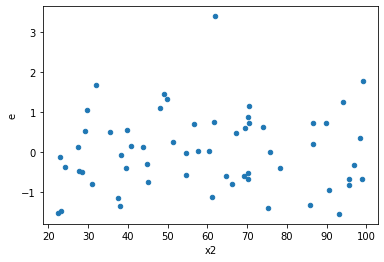

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,30.0,26.0,9.293524629436192,21.986136120258127,0.3097841543145397,0.845620620009928,2.729709083671614,0.011175258757778916,0.9944123706211105,0.005587629378889458,Reject001=1 : Homoscedasticity
7.0,34.0,22.0,39.09809966117711,27.619914107180218,1.1499441076816797,1.2554506412354645,1.09174927098543,0.844393999168785,0.5778030004156075,0.4221969995843925,Reject001=1 : Homoscedasticity
8.0,24.0,32.0,14.588578637106576,26.330868664008715,0.607857443212774,0.8228396457502724,1.3536720738356511,0.41889769956158074,0.7905511502192096,0.20944884978079037,Reject001=1 : Homoscedasticity
10.0,27.0,29.0,9.735750296259907,24.640163473858475,0.3605833443059225,0.8496608094433957,2.356350682472275,0.02582719253829091,0.9870864037308545,0.012913596269145455,Reject001=1 : Homoscedasticity
11.0,37.0,19.0,23.964276744229377,13.397896381254057,0.6476831552494426,0.7051524411186346,1.0887305550613846,0.8673545890211889,0.5663227054894056,0.43367729451059445,Reject001=1 : Homoscedasticity
12.0,19.0,37.0,12.913449701204966,41.98268643302563,0.6796552474318404,1.1346672008925844,1.669474642004254,0.1789384795316371,0.9105307602341814,0.08946923976581855,Reject001=1 : Homoscedasticity
14.0,27.0,29.0,15.819226043915457,24.130159936009193,0.5858972608857577,0.8320744805520411,1.420171310058889,0.3558310721272582,0.8220844639363709,0.1779155360636291,Reject001=1 : Homoscedasticity
15.0,35.0,21.0,26.079187696175037,19.064367041587285,0.745119648462144,0.9078270019803469,1.218364062542191,0.6425076695389222,0.6787461652305389,0.3212538347694611,Reject001=1 : Homoscedasticity
16.0,23.0,33.0,16.145334685609285,26.93836560751225,0.7019710732873602,0.816314109318553,1.1628885297163594,0.6789777347001551,0.6605111326499224,0.33948886735007755,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,39.0,17.0,43.759317761259034,11.94730467443491,1.1220337887502316,0.7027826279079359,0.6263471162403449,0.22543417532421203,Reject001=1 : Homoscedasticity
1.0,31.0,25.0,41.75362135586135,24.242304058525804,1.3468910114793984,0.9696921623410322,0.7199484992300464,0.38246120081683166,Reject001=1 : Homoscedasticity
2.0,30.0,26.0,9.293524629436192,21.986136120258127,0.3097841543145397,0.845620620009928,2.729709083671614,0.011175258757778916,Reject001=1 : Homoscedasticity
3.0,27.0,29.0,31.024096986432053,31.100002509393107,1.1490406291271131,1.072413879634245,0.9333124107621166,0.8601046201117142,Reject001=1 : Homoscedasticity
4.0,28.0,28.0,29.13916201329225,24.2880898053611,1.0406843576175804,0.8674317787628965,0.8335205313825338,0.6332372396441937,Reject001=1 : Homoscedasticity
5.0,29.0,27.0,36.225565604248295,28.959952412663732,1.2491574346292516,1.0725908300986566,0.8586514400540716,0.6861782167722373,Reject001=1 : Homoscedasticity
6.0,21.0,35.0,15.910169906004198,19.891229485139224,0.7576271383811523,0.5683208424325492,0.7501326360178963,0.4918550883401596,Reject001=1 : Homoscedasticity
7.0,34.0,22.0,39.09809966117711,27.619914107180218,1.1499441076816797,1.2554506412354645,1.09174927098543,0.844393999168785,Reject001=1 : Homoscedasticity
8.0,24.0,32.0,14.588578637106576,26.330868664008715,0.607857443212774,0.8228396457502724,1.3536720738356511,0.41889769956158074,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      988
Reject001=0 : Heteroscedasticity     12
Name: Result_test, dtype: int64